# INTRODUCTION

Hi my name is Ning Leung, and I am a Mechanical Engineer looking to explore the world of data science, and I took the Springboard’s “Data Science Career Track”. I was partner up with my mentor Michal, and together with her help, I embarked on the myriads of courses from the curriculum and applied the skillsets onto my capstone projects.
I have spent many years studying math, but programming had never been a major component of my work and statistics has always been a small blimp on my radar. I have had some exposure to writing simple scripts in MATLAB using C and played around in the Neural Network toolkit, but I would never consider myself someone comfortable with the tool or the language. So, as I progress through the coursework, reading textbooks, and watching lecture courses on statistical analysis and using Python for data analytics, it was both a refreshing and humbling experience. The experience definitely reminded me how enjoyable it was to learn something new along the way.
I knew from speaking to different data scientists in the industry, they have pointed me towards the powerful application of regression. When it was time for me to choose my capstone project, Michal had recommended me to explore time-series regression of a multivariate data set. And because I am fascinated by the weather and the environment, I have decided to investigate the pollution and air quality of Beijing. 


# THE PROBLEM

Beijing is famous for its pollution during the winter, and the smog gets especially thicker than usual due to the increased demand for burning coal for heat and electricity. A common way of measuring air quality is to investigate the concentration of fine particulate matter (PM2.5), these matters are a concoction of liquid droplets and small particles created from vehicle exhaust or powerplants with the size being 2.5 microns, hence the name PM2.5.
These small matters could get inside our body and get lodge inside our lungs and travel within the cardiovascular system, needless to say these pollutions can cause health issue. Having a good understanding of the PM2.5 concentration in the air is therefore important. The UCI Machine Learning database contains a set of hourly record of PM2.5 data from 2010 to 2015, measured from the U.S. Embassy at Beijing and it is further enhanced by additional meteorological data from Beijing Capital International Airport. 

So using these information, would it be possible to predict the PM2.5 concentration in the air with respect to time?

# THE SOLUTION

To tackle the problem is simple: we were given a time dependent dataset and looking to forecast into the future by observing the trend exhibited by the data, this type of problem is suitable to use linear regression for analysis. 

Without going into too much detail about linear regression. But a basic google search will yield a trove of examples and explanations on the metholodgies behind Time Series Linear Regression Models. The essential model reovlves around the form:

[Y] = b_0 + b_1 * [x] + e

Where,

b_0 is the intercept for the line represented from the above equation.
b_1 is the slope for the line based on x.
e is the deviation from the line plotted from the model.


In my case, the [x] would be the time variable, while the [y] would be the 2.5PM concentration. The intercept b_0 is where the PM2.5 ([y]) is when time ([x]) is zero.

To move forward with analysing the data, I pulled the csv files into panda dataframe and looked into the data structure:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from pylab import rcParams

In [2]:
#CSV Pull
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv', index_col = 0)

In [3]:
print(df.describe())

               year         month           day          hour         pm2.5  \
count  43824.000000  43824.000000  43824.000000  43824.000000  41757.000000   
mean    2012.000000      6.523549     15.727820     11.500000     98.613215   
std        1.413842      3.448572      8.799425      6.922266     92.050387   
min     2010.000000      1.000000      1.000000      0.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.750000     29.000000   
50%     2012.000000      7.000000     16.000000     11.500000     72.000000   
75%     2013.000000     10.000000     23.000000     17.250000    137.000000   
max     2014.000000     12.000000     31.000000     23.000000    994.000000   

               DEWP          TEMP          PRES           Iws            Is  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean       1.817246     12.448521   1016.447654     23.889140      0.052734   
std       14.433440     12.198613     10.268698    

In [4]:
print(df.dtypes)

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


I noticed the [year], [month], [day] and [hour] columns are all in int64 format, I chose to convert these columns into strings to help perform time series analysis and used back fill to imputate an y missing data for the PM2.5 columns. 

In [5]:
df['month']=df.month.apply(str)
df['day']=df.day.apply(str)
df['hour']=df.hour.apply(str)
df['month']=df['month'].apply(lambda x: x.zfill(2))
df['day']=df['day'].apply(lambda x: x.zfill(2))
df['hour']=df['hour'].apply(lambda x: x.zfill(2))
print(df.head())

    year month day hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
No                                                                    
1   2010    01  01   00    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2   2010    01  01   01    NaN   -21 -12.0  1020.0   NW   4.92   0   0
3   2010    01  01   02    NaN   -21 -11.0  1019.0   NW   6.71   0   0
4   2010    01  01   03    NaN   -21 -14.0  1019.0   NW   9.84   0   0
5   2010    01  01   04    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [6]:
# Use back fill to imputate any missing data for PM2.5
# Followed by checking for any NaN remaining
df['pm2.5']=df['pm2.5'].fillna(method='bfill')
df['pm2.5'].isnull().sum()

0

Futher combing the [year], [month], [day], [hour] columns into a single column calle [period], now I can plot the PM2.5 vs. Time for regression analysis.

In [7]:
df["period"] = df["year"].map(str) + '-' + df["month"].map(str) + '-' + df["day"].map(str) + '-' + df["hour"].map(str) + ':00:00'
print(df["period"].head())
print(df["period"].tail())

No
1    2010-01-01-00:00:00
2    2010-01-01-01:00:00
3    2010-01-01-02:00:00
4    2010-01-01-03:00:00
5    2010-01-01-04:00:00
Name: period, dtype: object
No
43820    2014-12-31-19:00:00
43821    2014-12-31-20:00:00
43822    2014-12-31-21:00:00
43823    2014-12-31-22:00:00
43824    2014-12-31-23:00:00
Name: period, dtype: object


In [8]:
df['Date']=pd.to_datetime(df['period'], format='%Y-%m-%d-%H:%M:%S')

In [9]:
ts = pd.Series(df['pm2.5'].values, index=df['Date'])

Plotting the PM2.5 column agains the period column, this is what returns:

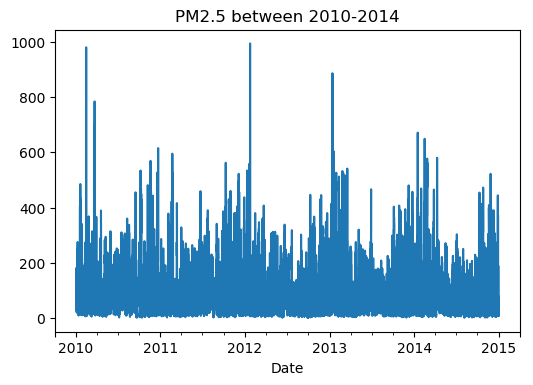

In [10]:
fig = plt.figure(figsize=(6,4), dpi=100)
ts.plot()
plt.yscale('linear')
plt.title('PM2.5 between 2010-2014')
plt.show()

The plots showed the dataset possess seasonality - the concentration of the PM2.5 particulate matters are higher during the winter periods of November to February than the summer months of May to September, and the cyclic trend can be observed annually between the individual year plots. 

To perform a regression analysis, I used Facebook Prophet, a helpful opensource tool created specifically to forecast time series data at scale.

For additional information, you can visit the site here: https://facebook.github.io/prophet/

# FACEBOOK PROPHET

In [11]:
!pip install fbprophet
from fbprophet import Prophet
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Creating a new "period" column for dates

To check predicted values versus the actuaL PM2.5 values from Prophet's forecasting, the results from the year 2014 was omitted from the training data set, and a new 'period' time series with data ranging from 2010 to 2013. 

In [12]:
#Isolated 2014 for prediction later
df.loc[df['year'] != 2014];
df["period"] = df["year"][:35063].map(str) + '-' + df["month"].map(str) + '-' + df["day"].map(str) + '-' + df["hour"].map(str) + ':00:00'
print(df["period"].tail())

No
43820    NaN
43821    NaN
43822    NaN
43823    NaN
43824    NaN
Name: period, dtype: object


In [13]:
# Check for any NaN in the Dew Point Column
print(df['DEWP'].isnull().sum())
dewp = df['DEWP'];

0


# First Forecast

In [14]:
# Creating a new DataFrame for time and PM2.5 data between 2010 and 2013.
df0 = df[['period', 'pm2.5']].fillna(method='bfill')
df0=df0.dropna()
df0.columns = ['ds','y']
print(df0.tail())

                        ds     y
No                              
35059  2013-12-31-18:00:00  15.0
35060  2013-12-31-19:00:00  22.0
35061  2013-12-31-20:00:00  18.0
35062  2013-12-31-21:00:00  23.0
35063  2013-12-31-22:00:00  20.0


In [15]:
m = Prophet()
m.fit(df0);
future = m.make_future_dataframe(periods=8761, freq='H')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.shape

D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(43824, 22)

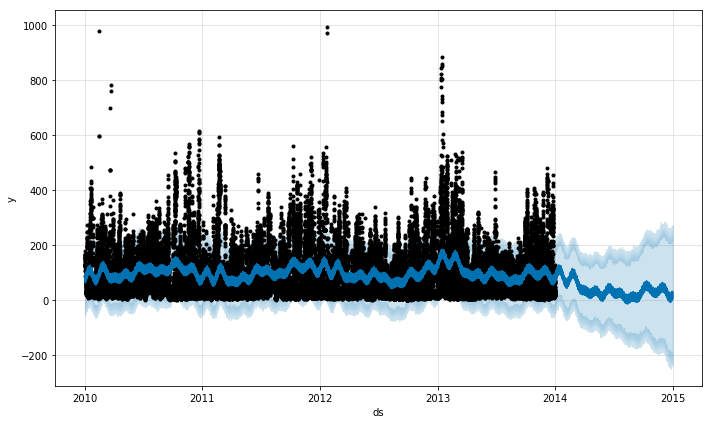

In [16]:
m.plot(forecast);

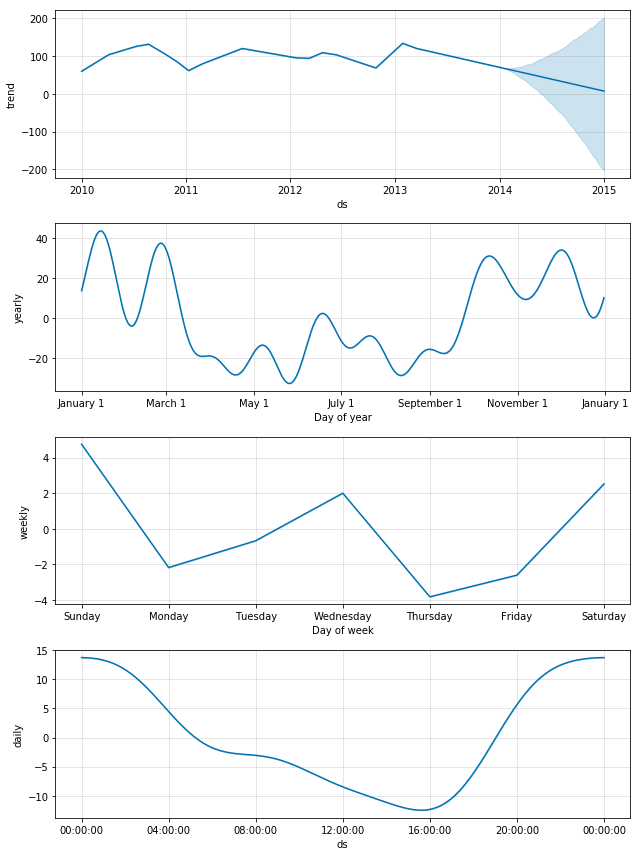

In [17]:
forecast_components = m.plot_components(forecast)

# First Forecast - Results
Notice the forecast of the PM2.5 values into the 2014 as well as the seasonality between the daily, weekly, and monthly values.

From the first prediction using time as a sole regressor, we see:
    
    1. The PM2.5 values are higher during the evening and lower during the day time.
    2. The PM2.5 is peaks during wednesday and weekends.
    3. The winter months have a higher concentration of matter than the summer months.
    
But this is only the beginning of the Time-Series forecasting, Prophet allow for multiple regressions into the "ds" dataset. Now I will add dewpoint "DEW" into the dataframe.

# Second Forecast - 1 Additional Regressor

In [18]:
df1 = df[['period', 'pm2.5', 'DEWP']].fillna(method='bfill')
df1=df1.dropna()
print(df1.head())
print(df1.tail())

                 period  pm2.5  DEWP
No                                  
1   2010-01-01-00:00:00  129.0   -21
2   2010-01-01-01:00:00  129.0   -21
3   2010-01-01-02:00:00  129.0   -21
4   2010-01-01-03:00:00  129.0   -21
5   2010-01-01-04:00:00  129.0   -20
                    period  pm2.5  DEWP
No                                     
35059  2013-12-31-18:00:00   15.0   -19
35060  2013-12-31-19:00:00   22.0   -19
35061  2013-12-31-20:00:00   18.0   -21
35062  2013-12-31-21:00:00   23.0   -21
35063  2013-12-31-22:00:00   20.0   -21


In [19]:
df1.columns = ['ds','y', 'DEWP']

### Using [period], and [DEWP] as Additional Regressors in Prophet

In [20]:
# Calling the FB Prophet method, adding a second regressor for DEWP
m = Prophet()
m.add_regressor('DEWP')
m.fit(df1);

D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [21]:
# The prediction period was one year in hours, hence the period is 8761 points. 
# Appending the DEWP colunms into the future dataframe, including DEWP data for 2014.
future1 = m.make_future_dataframe(periods=8761, freq='H')
future1.loc[:,'DEWP']=df['DEWP']
future1 = future1.iloc[1:]
future1.isnull()

,ds,DEWP
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False


In [22]:
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast1.shape

(43823, 28)

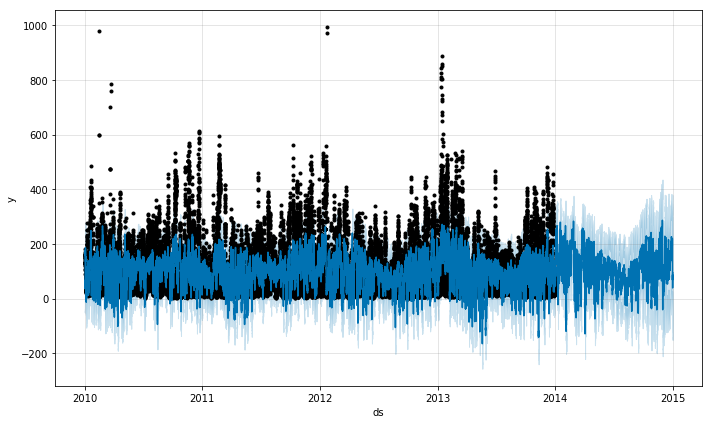

In [23]:
forecast1_plot = m.plot(forecast1)

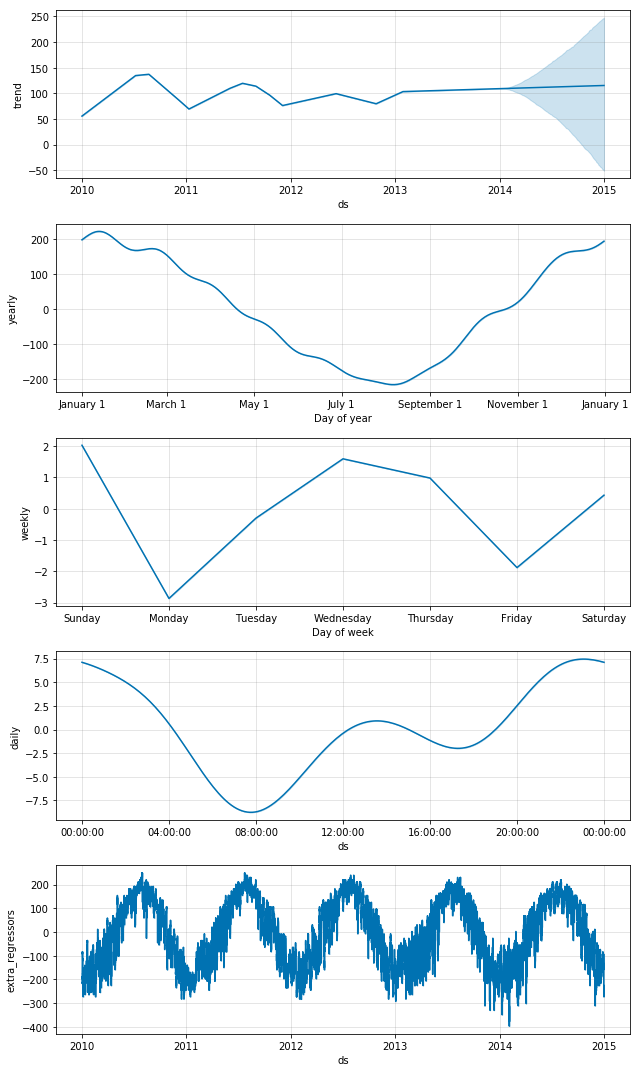

In [24]:
forecast1_components = m.plot_components(forecast1)

# Second Forecast - Results

Compared to the First Forecast, the forecast1 plot looked to have closer resemblance to the actual measured data. Although it is worthy to point that the predicted values goes into negative, which we know that to be false. However, looking into the seasonality of the data, I see the following: 
    
    1. Again, the results of the PM2.5 values are higher during the evening and lower during the day time.
    2. The PM2.5 concentrate is higher during mid week and Sunday, in particular.
    3. The seasonality over the year shows that winter is again the period with higher concentration of PM2.5 values.
    4. The trend is increasing with an additional regression in the Second Forecast, which is different from the negative slope from the First Forecast.
    
Next, I analyzed the data set with two regressors, Temperature and Dew Point, to see how the prediction changes.

# Third Forecast - 2 Additional Regressors

In [25]:
print(df['TEMP'].isnull().sum())
temp = df['TEMP']
df2 = df[['period', 'pm2.5', 'DEWP', 'TEMP']].fillna(method='bfill')
df2=df2.dropna()

0


In [26]:
df2.columns = ['ds', 'y', 'DEWP', 'TEMP']
print(df2.head());
# Calling the FB Prophet method, adding a second regressor for TEMP
m = Prophet()
m.add_regressor('DEWP')
m.add_regressor('TEMP')
m.fit(df2);

                     ds      y  DEWP  TEMP
No                                        
1   2010-01-01-00:00:00  129.0   -21 -11.0
2   2010-01-01-01:00:00  129.0   -21 -12.0
3   2010-01-01-02:00:00  129.0   -21 -11.0
4   2010-01-01-03:00:00  129.0   -21 -14.0
5   2010-01-01-04:00:00  129.0   -20 -12.0


D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Using [period], [DEWP] and [TEMP] as Additional Regressors in Prophet

In [27]:
# The prediction period was one year in hours, hence the period is 8761 points. 
# Appending the DEWP colunms into the future dataframe, including DEWP data for 2014.
future2 = m.make_future_dataframe(periods=8761, freq='H')
future2.loc[:,'DEWP']=df['DEWP']
future2.loc[:,'TEMP']=df['TEMP']
#################################
# For some reason, index row 0 contains a NaN that cannot be removed, the DataFrame was reset by starting off at index row 1.
#################################
future2 = future2.iloc[1:]
future2.isnull()

,ds,DEWP,TEMP
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False


In [28]:
forecast2 = m.predict(future2);

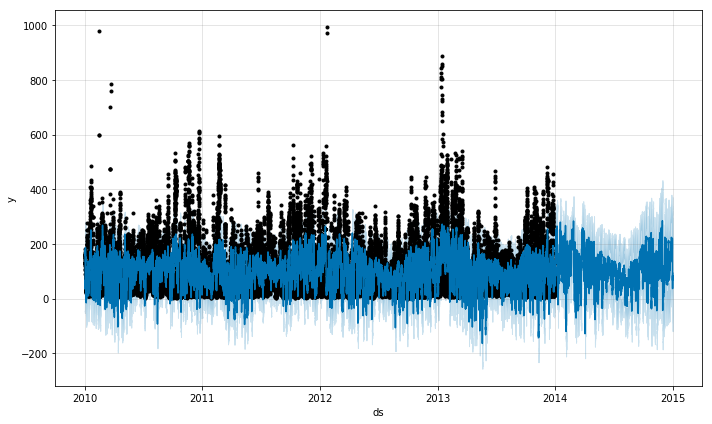

In [29]:
forecast2_plot = m.plot(forecast2)

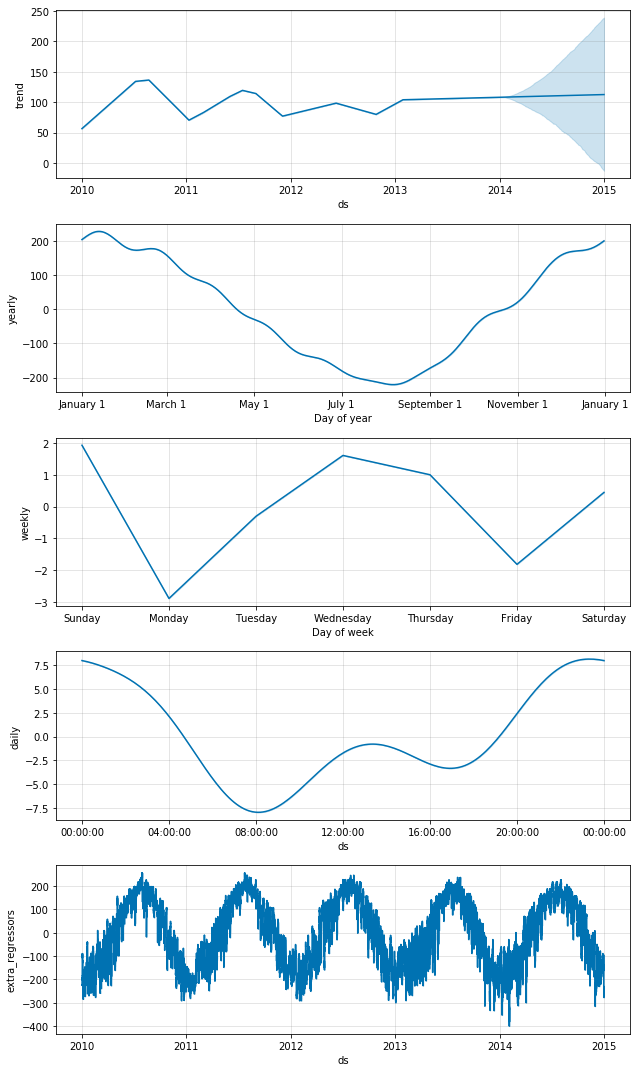

In [30]:
forecast2_components = m.plot_components(forecast2)

In [31]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast2.shape;

# Third Forecast - Results

The third forecast with temperature and dew points as additional regressors created similar results with the second trial, the data showed the following:
    
    1. PM2.5 values are higher during the evening.
    2. Midweek and sundays have higher concentration.
    3. Winter concentration > Summer concentration.
    4. The trend also has a positive slope.
    
To compared the results by numbers, I looked into the R squared values of the predicted values [yhats] to actual values [pm2.5]

### Comparing Predicted Data vs. Actual using RMSE and MAE

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [33]:
# Mean Squared Error
mse = mean_squared_error(df['pm2.5'][35063:], forecast['yhat'][35063:])
mse1 = mean_squared_error(df['pm2.5'][35064:], forecast1['yhat'][35063:])
mse2 = mean_squared_error(df['pm2.5'][35064:], forecast2['yhat'][35063:])
print(mse)
print(mse1)
print(mse2)

11626.138082996717
5201.8373237084
5159.553842105832


In [34]:
# Calculate RMSE
rmse = sqrt(mse)
rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)
print('First Forecast RMSE is ' +str(rmse))
print('Second Forecast RMSE is ' +str(rmse1))
print('Third Forecast RMSE is ' +str(rmse2))

First Forecast RMSE is 107.82457086859523
Second Forecast RMSE is 72.12376393192746
Third Forecast RMSE is 71.83003440139669


In [35]:
# Calculate the Mean Absolute Errors
print(mean_absolute_error(df['pm2.5'][35063:], forecast['yhat'][35063:]))
print(mean_absolute_error(df['pm2.5'][35064:], forecast2['yhat'][35063:]))

73.85753441052282
55.14564500124751


# Results Summary

The major take away was that the RMSE for the additional regressors decreased, the the errors are minimized. Which show that adding the additional regressors help improve the accuracy of the results. However, the change between the second and third forecast with the additional [TEMP] regressors only marginal improvement, which could limit the prediction by overfitting.

Additional sampling could be done by additional a 3rd regressor to the data set, as well as switching the second forecasting with [TEMP] instead of [DEWP] to compare the difference in values. 

To compare results, I'm going to use another time-series regression modeling with AutoRegressive Integrated Moving Average (ARIMA) and see if I could produce similar forecasting.

## ARIMA MODELING



In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams

In [37]:
year_2014 = df["year"][35064:].map(str) + '-' + df["month"].map(str) + '-' + df["day"].map(str) + '-' + df["hour"].map(str) + ':00:00'
year_2014 = year_2014.dropna()
pm25 = df['pm2.5'][35064:]
data = pd.concat([year_2014, pm25], axis=1, keys=['year_2014','pm25'])
data.set_index('year_2014', inplace=True)
data.index = pd.to_datetime(data.index)

In [38]:
print(ts.isnull().sum())
ts.fillna(method='bfill')

0


Date
2010-01-01 00:00:00    129.0
2010-01-01 01:00:00    129.0
2010-01-01 02:00:00    129.0
2010-01-01 03:00:00    129.0
2010-01-01 04:00:00    129.0
2010-01-01 05:00:00    129.0
2010-01-01 06:00:00    129.0
2010-01-01 07:00:00    129.0
2010-01-01 08:00:00    129.0
2010-01-01 09:00:00    129.0
2010-01-01 10:00:00    129.0
2010-01-01 11:00:00    129.0
2010-01-01 12:00:00    129.0
2010-01-01 13:00:00    129.0
2010-01-01 14:00:00    129.0
2010-01-01 15:00:00    129.0
2010-01-01 16:00:00    129.0
2010-01-01 17:00:00    129.0
2010-01-01 18:00:00    129.0
2010-01-01 19:00:00    129.0
2010-01-01 20:00:00    129.0
2010-01-01 21:00:00    129.0
2010-01-01 22:00:00    129.0
2010-01-01 23:00:00    129.0
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
2010-01-02 05:00:00    109.0
                       ...  
2014-12-30 18:00:00     79.0
2014-12-30 19:00:00     35.0
2014-12-30 20:00:00     26.0
2014-12-3

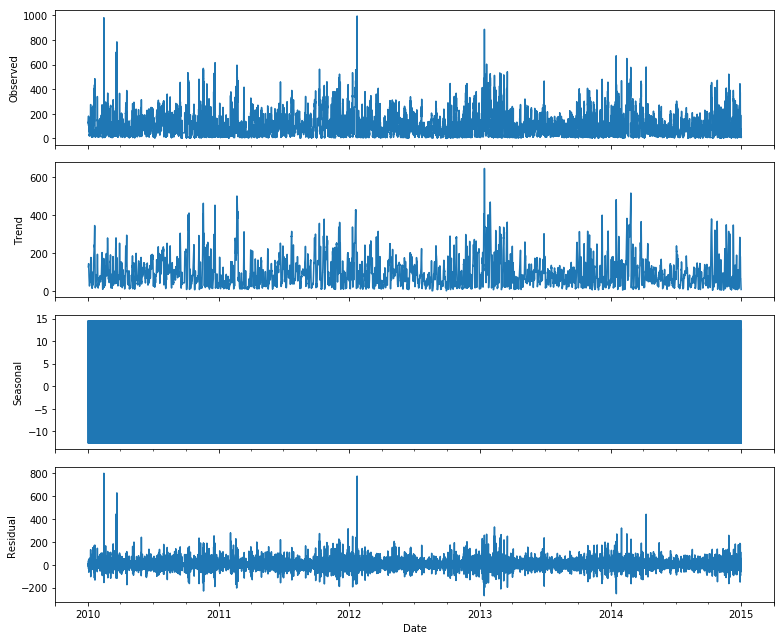

In [39]:
rcParams['figure.figsize'] = 11, 9
result = seasonal_decompose(ts, model='additive')
fig = result.plot()
plt.show()

### ACF & PACF Plots

In [40]:
lag_acf = acf(ts, nlags=24)
lag_pacf = pacf(ts, nlags=24, method='ols')

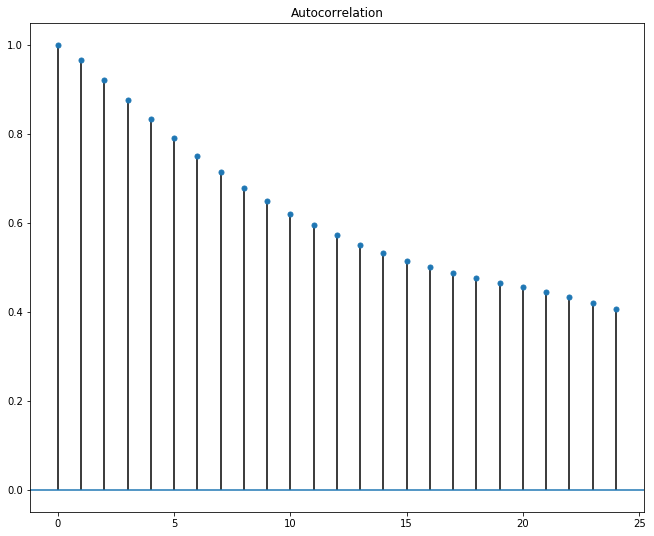

In [41]:
plot_acf(ts, alpha=1, lags=24)
plt.show()

KeyboardInterrupt: 

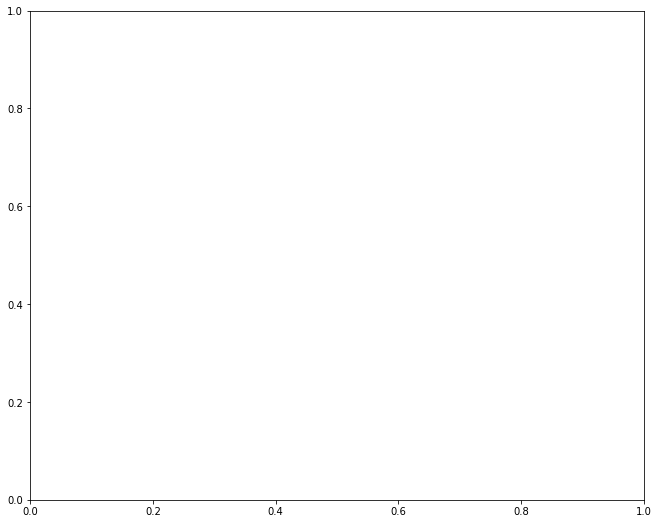

In [42]:
plot_pacf(ts, lag=12)
plt.show()

### Auto-Regressive (AR) Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


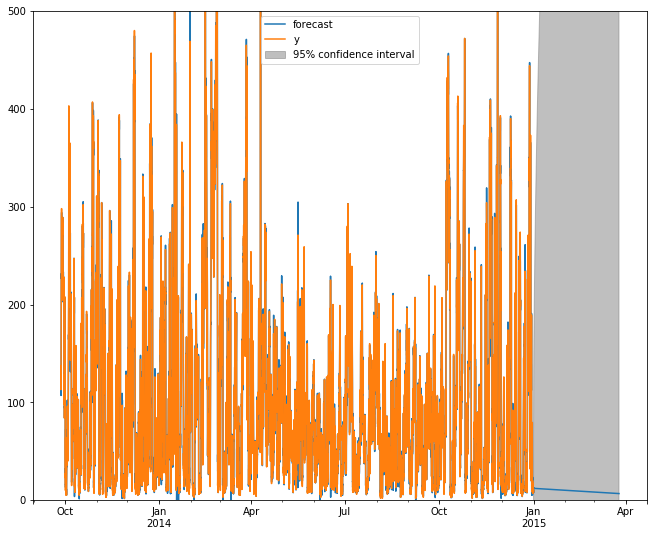

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                43823
Model:                ARIMA(12, 1, 0)   Log Likelihood             -200572.077
Method:                       css-mle   S.D. of innovations             23.522
Date:                Mon, 30 Apr 2018   AIC                         401172.154
Time:                        20:24:01   BIC                         401293.785
Sample:                    01-01-2010   HQIC                        401210.489
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.097     -0.027      0.978      -0.194       0.188
ar.L1.D.y      0.1529      0.005     32.025      0.000       0.144       0.162
ar.L2.D.y     -0.0251      0.005     -5.189      0.0

In [47]:
model = ARIMA(ts, order=(12,1,0))
res_AR = model.fit(disp=-1)
res_AR.plot_predict(start=32767, end=45823)
plt.ylim(0, 500)
plt.show()
#plt.plot(results_AR.fittedvalues, color='red')
print(res_AR.summary())

In [53]:
np.asarray(ts)
ts.dtypes
ts.tail()

Date
2014-12-31 19:00:00     8.0
2014-12-31 20:00:00    10.0
2014-12-31 21:00:00    10.0
2014-12-31 22:00:00     8.0
2014-12-31 23:00:00    12.0
dtype: float64

### Moving Average (MA) Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


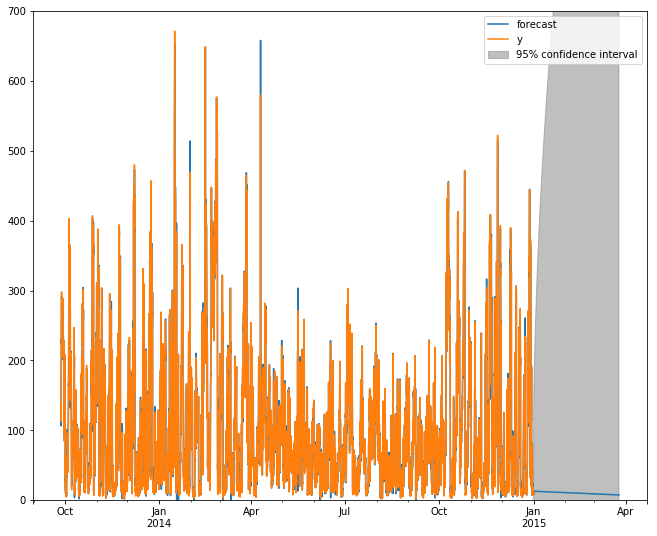

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                43823
Model:                ARIMA(0, 1, 12)   Log Likelihood             -200501.923
Method:                       css-mle   S.D. of innovations             23.484
Date:                Mon, 30 Apr 2018   AIC                         401031.846
Time:                        20:30:17   BIC                         401153.477
Sample:                    01-01-2010   HQIC                        401070.181
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.077     -0.035      0.972      -0.154       0.148
ma.L1.D.y      0.1482      0.005     31.006      0.000       0.139       0.158
ma.L2.D.y     -0.0086      0.005     -1.774      0.0

In [50]:
model = ARIMA(ts, order=(0,1,12))
res_MA = model.fit(disp=-1)
res_MA.plot_predict(start=32767, end=45823)
plt.ylim(0,700)
plt.show()
print(res_MA.summary())

### ARIMA Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


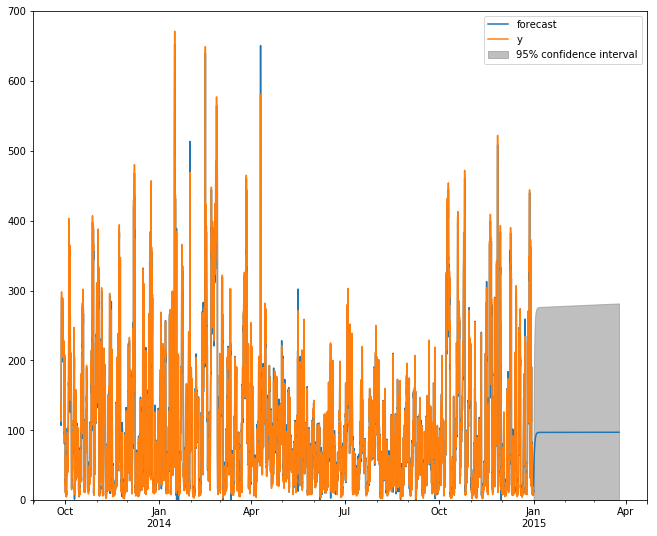

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                43823
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -200260.207
Method:                       css-mle   S.D. of innovations             23.354
Date:                Mon, 30 Apr 2018   AIC                         400532.414
Time:                        20:34:26   BIC                         400584.542
Sample:                    01-01-2010   HQIC                        400548.844
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.306e-05      0.002      0.034      0.973      -0.005       0.005
ar.L1.D.y      1.1462      0.029     39.910      0.000       1.090       1.203
ar.L2.D.y     -0.1877      0.028     -6.764      0.0

In [51]:
model = ARIMA(ts, order=(2,1,2))
res_ARIMA = model.fit(disp=-1)
res_ARIMA.plot_predict(start=32767, end=45823)
plt.ylim(0, 700)
plt.show()
print(res_ARIMA.summary())

# ARIMA Modeling Results

Looking at the Trend of both the Auto-Regressive and Moving-Average model, the trend of both model showed a decrease of "y" or "PM2.5" value. However, the ARIMA provided a different result of an expoential increase in y-value in January and the trend remaining in the 100~ zone, which shares similarities between the Facebook Prophet's results in the multi-regressor model.. The ARIMA model and Facebook Prophet forecasting showed a more realistic result, as the PM2.5 cannot realistically  disappear over a 4 months period unless all vehicle traffics and energy production to come to a complete stand still. 

So what does the time-series forecasts mean at the end? The real world situation of the PM2.5 level in Beijing is more than time-dependent, as shown in both the Facebook Prophet forecasting and the ARIMA model, the PM2.5 concentration is sensitive to the atmosphereic condition present at the time such as temperature and dew point. Additional analysis with multivariable into the ARIMA model could shed more light into the issue. 